In [2]:
%load_ext autoreload

In [3]:
import sys
#sys.path = ['/hysplit-users/alicec/anaconda3/envs/envai/lib/','/hysplit3/alicec/projects/karymsky/karymsky/']

In [9]:
%autoreload
# set the correct paths.
sys.path
exists=False
#sys.path.append('/hysplit3/alicec/projects/karymsky/karymsky/')
for p in sys.path:  
    print(p)
    if 'monet' in p:
        sys.path.remove(p)
        print('Removed monet path:', p)
    if 'utilhysplit' in p:
        sys.path.remove(p)
        print('Removed utilhysplit path:', p)
    if 'karymsky' in p:
        exists = True

if not exists:
    sys.path.append('/hysplit3/alicec/projects/karymsky/karymsky/')
    print('Added karymsky path')


/hysplit-users/alicec/anaconda3/bin
/pub/ECMWF/alicec/monetio
Removed monet path: /pub/ECMWF/alicec/monetio
/hysplit-users/alicec/tags/hysplit.v5.3.0/python/hysplitplot
/hysplit-users/alicec/anaconda3/envs/envai/lib/python312.zip
/hysplit-users/alicec/anaconda3/envs/envai/lib/python3.12
/hysplit-users/alicec/anaconda3/envs/envai/lib/python3.12/lib-dynload

/hysplit-users/alicec/anaconda3/envs/envai/lib/python3.12/site-packages
/hysplit-users/alicec/anaconda3/envs/envai/lib/python3.12/site-packages/hysplitdata-0.0.10-py3.12.egg
/hysplit-users/alicec/anaconda3/envs/envai/lib/python3.12/site-packages/pytz-2021.1-py3.12.egg
/hysplit3/alicec/projects/karymsky/karymsky/


In [10]:
import readers
import datetime
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import emissions

In [12]:
%autoreload
fff=emissions.get_met_emission_files()
qqq = fff[0:8]
print(qqq)
df2 = pd.read_csv(qqq[0])
df2 = emissions.process(df2)
df2

['/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111030800.csv', '/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111030900.csv', '/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111031200.csv', '/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111031800.csv', '/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111040000.csv', '/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111040600.csv', '/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111041200.csv', '/hysplit3/alicec/projects/karymsky/MetOffice_results/results_sources_202111041800.csv']


,date,ht,mass,psize
0,2021-11-03 07:00:00,1486.0,2.709864e+10,1
1,2021-11-03 07:00:00,3486.0,2.709864e+09,1
2,2021-11-03 07:00:00,5486.0,2.709864e+09,1
3,2021-11-03 07:00:00,7486.0,2.544071e+10,1
4,2021-11-03 07:00:00,9486.0,1.455604e+10,1
5,2021-11-03 07:00:00,11486.0,7.501941e+08,1


In [13]:
%autoreload
fff = emissions.get_met_emission_files(version='m1')
fff.sort()
df = pd.read_csv(fff[0])
df
emissions.process(df)

,date,ht,mass,psize
0,2021-11-03 07:00:00,1486.0,2.709864e+10,1
1,2021-11-03 07:00:00,3486.0,2.709864e+10,1
2,2021-11-03 07:00:00,5486.0,2.709864e+10,1
3,2021-11-03 07:00:00,7486.0,2.544071e+10,1
4,2021-11-03 07:00:00,9486.0,1.455604e+10,1
5,2021-11-03 07:00:00,11486.0,7.501964e+08,1


In [14]:
import plottcm

In [15]:
df.pivot(index='ht', columns='date')

,top,lat,lon,width,duration,rate,mass,psize
date,2021-11-03 07:00:00,2021-11-03 07:00:00,2021-11-03 07:00:00,2021-11-03 07:00:00,2021-11-03 07:00:00,2021-11-03 07:00:00,2021-11-03 07:00:00,2021-11-03 07:00:00
ht,,,,,,,,
1486.0,3.486,54.05,159.44,0.0,1.0,7.527401e+06,2.709864e+10,1
3486.0,5.486,54.05,159.44,0.0,1.0,7.527401e+06,2.709864e+10,1
5486.0,7.486,54.05,159.44,0.0,1.0,7.527401e+06,2.709864e+10,1
7486.0,9.486,54.05,159.44,0.0,1.0,7.066863e+06,2.544071e+10,1
9486.0,11.486,54.05,159.44,0.0,1.0,4.043345e+06,1.455604e+10,1
11486.0,13.486,54.05,159.44,0.0,1.0,2.083879e+05,7.501964e+08,1


(<Axes: ylabel='MER kg/s'>,
 ht                        1486.0        3486.0        5486.0        7486.0   \
 date                                                                          
 2021-11-03 07:00:00  2.709864e+10  2.709864e+10  2.709864e+10  2.544071e+10   
 
 ht                        9486.0        11486.0  
 date                                             
 2021-11-03 07:00:00  1.455604e+10  7.501964e+08  )

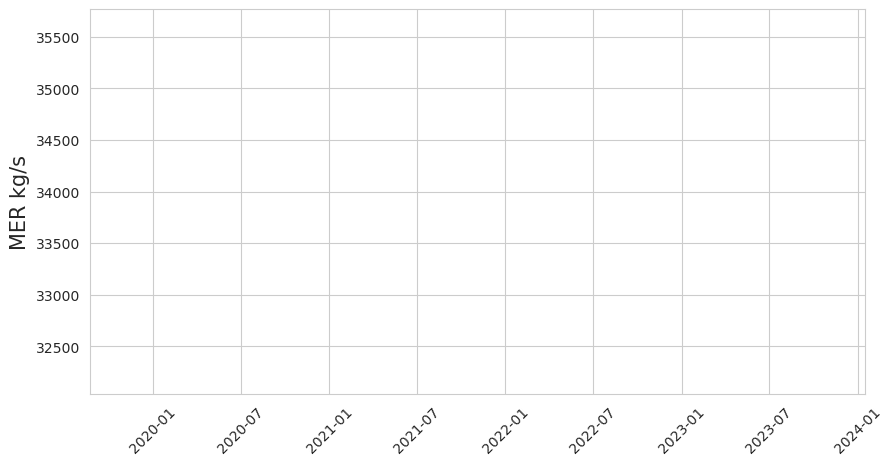

In [16]:
plottcm.plot_emissions_timeseries(df)

0 /hysplit3/alicec/projects/karymsky/HYSPLIT_results/HYSPLIT_emissions_forecast1.csv
1 /hysplit3/alicec/projects/karymsky/HYSPLIT_results/HYSPLIT_emissions_forecast2.csv
2 /hysplit3/alicec/projects/karymsky/HYSPLIT_results/HYSPLIT_emissions_forecast3.csv
3 /hysplit3/alicec/projects/karymsky/HYSPLIT_results/HYSPLIT_emissions_forecast4.csv
4 /hysplit3/alicec/projects/karymsky/HYSPLIT_results/HYSPLIT_emissions_forecast5.csv


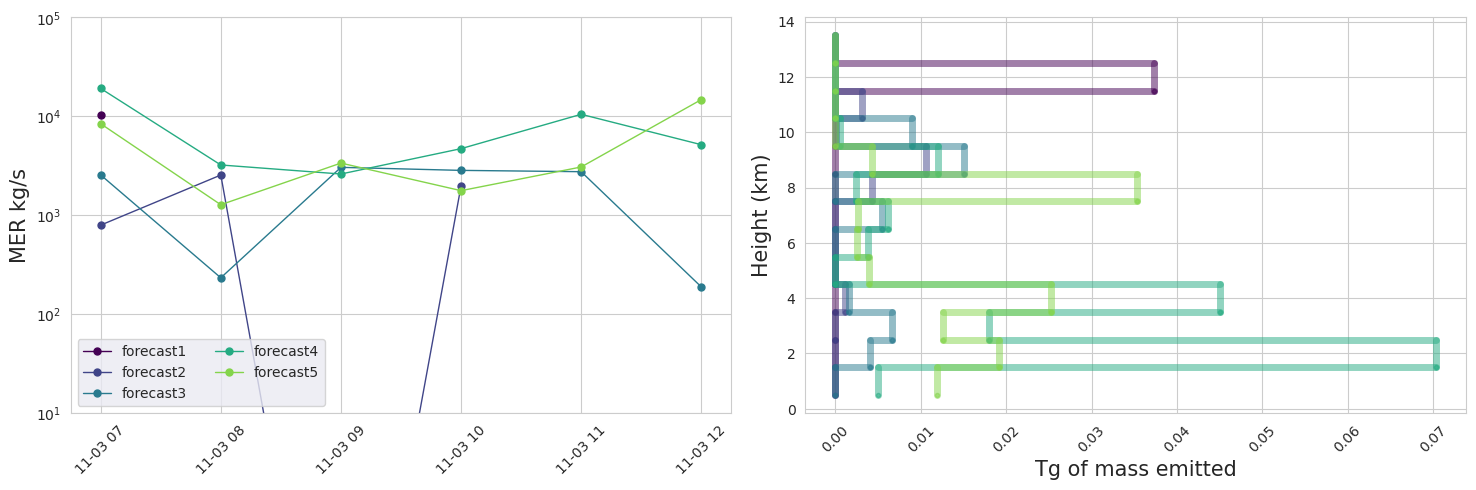

In [17]:
%autoreload
ax, ax2 = emissions.plot_met_emissions(version='n0')
plt.tight_layout()
#ax = plt.gca()
ax.set_ylim(1e1,1e5)
plt.savefig('EmissionsNoaa.v0.jpg')

0 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111030800.csv
1 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111030900.csv
2 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111031200.csv
3 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111031800.csv
4 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111040000.csv
5 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111040600.csv
6 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111041200.csv
7 /hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/results_sources_202111041800.csv


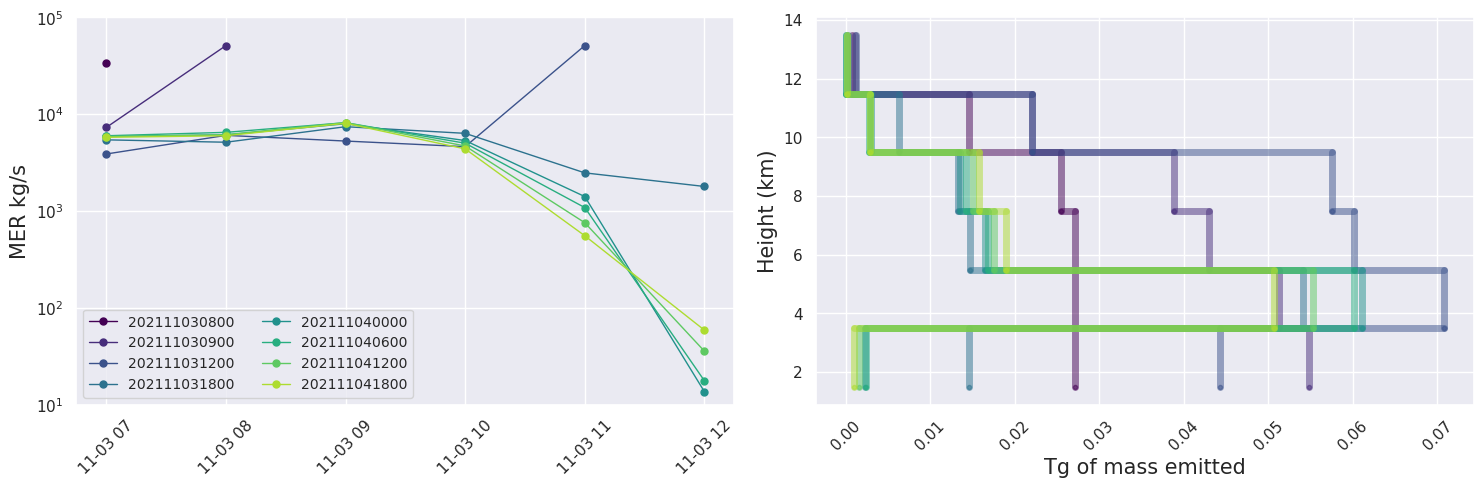

In [18]:
%autoreload
#TODO - make sure the hour labeling is correct.


ax,ax2 = emissions.plot_met_emissions(version='m1')
plt.tight_layout()
ax.set_ylim(1e1,1e5)
plt.savefig('EmissionsMetOffice.v1.jpg')

#plt.show()
#emissions.plot_met_emissions(version='m0')
#ax.set_ylim(1e1,1e5)
#plt.tight_layout()
#plt.savefig('EmissionsMetOffice.v0.jpg')

In [19]:
%autoreload
bdir = '/hysplit3/alicec/projects/karymsky/MetOffice_results_Feb2025/'
adir = '/hysplit3/alicec/projects/karymsky/HYSPLIT_results/'
cdir = '/hysplit3/alicec/projects/karymsky/Bom/'
vdir = '/hysplit3/alicec/projects/karymsky/volcat2/pc_corrected/'
comp = readers.Comparison(noaadir=adir,metdir=bdir,bomdir=cdir, volcatdir=vdir)

2021-11-03 18:00:00
2021-11-04 00:00:00
2021-11-04 06:00:00
2021-11-04 12:00:00
2021-11-04 18:00:00
2021-11-05 00:00:00
2021-11-05 06:00:00
2021-11-05 12:00:00
2021-11-03 18:00:00
2021-11-04 00:00:00
2021-11-04 06:00:00
2021-11-04 12:00:00
2021-11-04 18:00:00
2021-11-05 00:00:00
2021-11-05 06:00:00
2021-11-05 12:00:00
2021-11-03 18:00:00
2021-11-04 00:00:00
2021-11-04 06:00:00
2021-11-04 12:00:00
2021-11-04 18:00:00
2021-11-05 00:00:00
2021-11-05 06:00:00
2021-11-05 12:00:00


In [20]:
flist = [datetime.datetime(2021,11,3,9,0)]
flist.append(datetime.datetime(2021,11,3,12,0))
flist.append(datetime.datetime(2021,11,3,18,0))
flist.append(datetime.datetime(2021,11,4,0,0))
flist.append(datetime.datetime(2021,11,4,6,0))
for f in flist:
    comp.get(f)

working on 0 VOLCAT_HIMAWARI-8_FLDK_s2021307_090000_g002_v300125_VCB_w167_FLDK_b2021307_073000_g001_pc.nc out of 6
working on 1 VOLCAT_HIMAWARI-8_FLDK_s2021307_091000_g002_v300125_VCB_w167_FLDK_b2021307_073000_g001_pc.nc out of 6
working on 2 VOLCAT_HIMAWARI-8_FLDK_s2021307_092000_g002_v300125_VCB_w167_FLDK_b2021307_073000_g001_pc.nc out of 6
working on 3 VOLCAT_HIMAWARI-8_FLDK_s2021307_093000_g002_v300125_VCB_w167_FLDK_b2021307_073000_g001_pc.nc out of 6
working on 4 VOLCAT_HIMAWARI-8_FLDK_s2021307_094000_g002_v300125_VCB_w167_FLDK_b2021307_073000_g001_pc.nc out of 6
working on 5 VOLCAT_HIMAWARI-8_FLDK_s2021307_095000_g002_v300125_VCB_w167_FLDK_b2021307_073000_g001_pc.nc out of 6
Total mass volcat 0.026732546898225944
Max mass loading volcat <xarray.DataArray 'ash_mass_loading' ()> Size: 8B
np.float64(8.523029081128092)
0.014439764523989823
0.027045172989335352
working on 0 VOLCAT_HIMAWARI-8_FLDK_s2021307_120000_g002_v300125_VCB_w167_FLDK_b2021307_073000_g001_pc.nc out of 6
working on

In [21]:
%autoreload
import plotcdf

2021-11-03 09:00:00
HERE 4
2021-11-03 12:00:00
HERE 4
2021-11-03 18:00:00
HERE 4
2021-11-04 00:00:00
HERE 4
2021-11-04 06:00:00
HERE 4


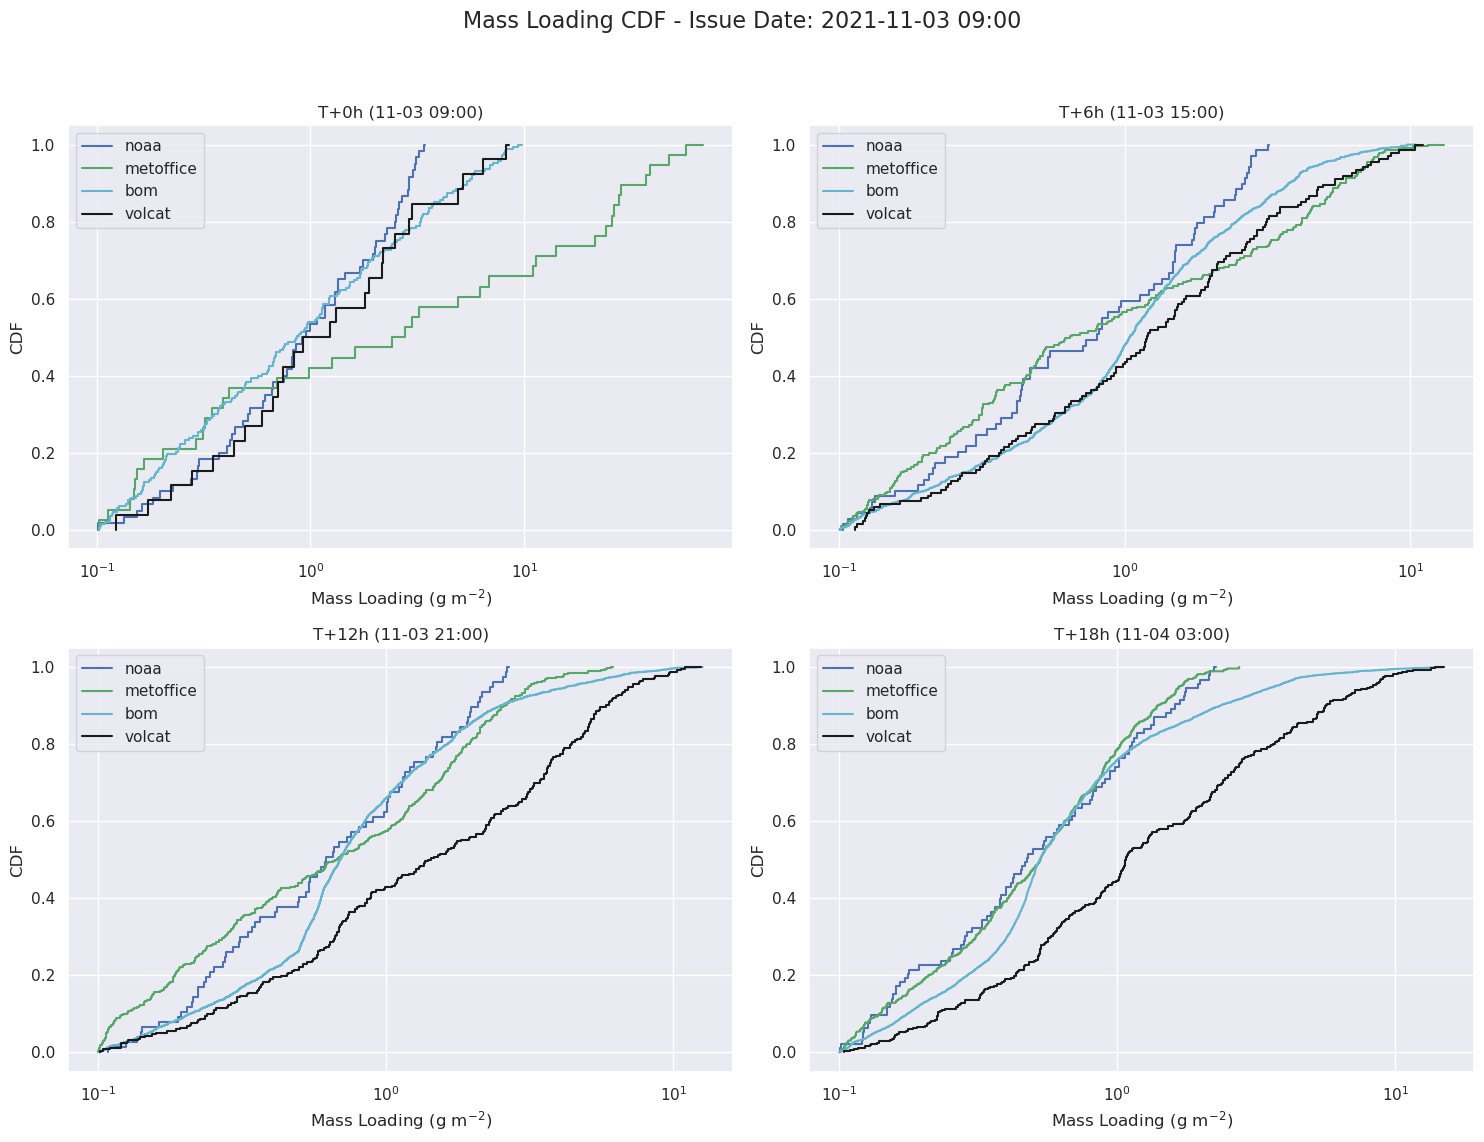

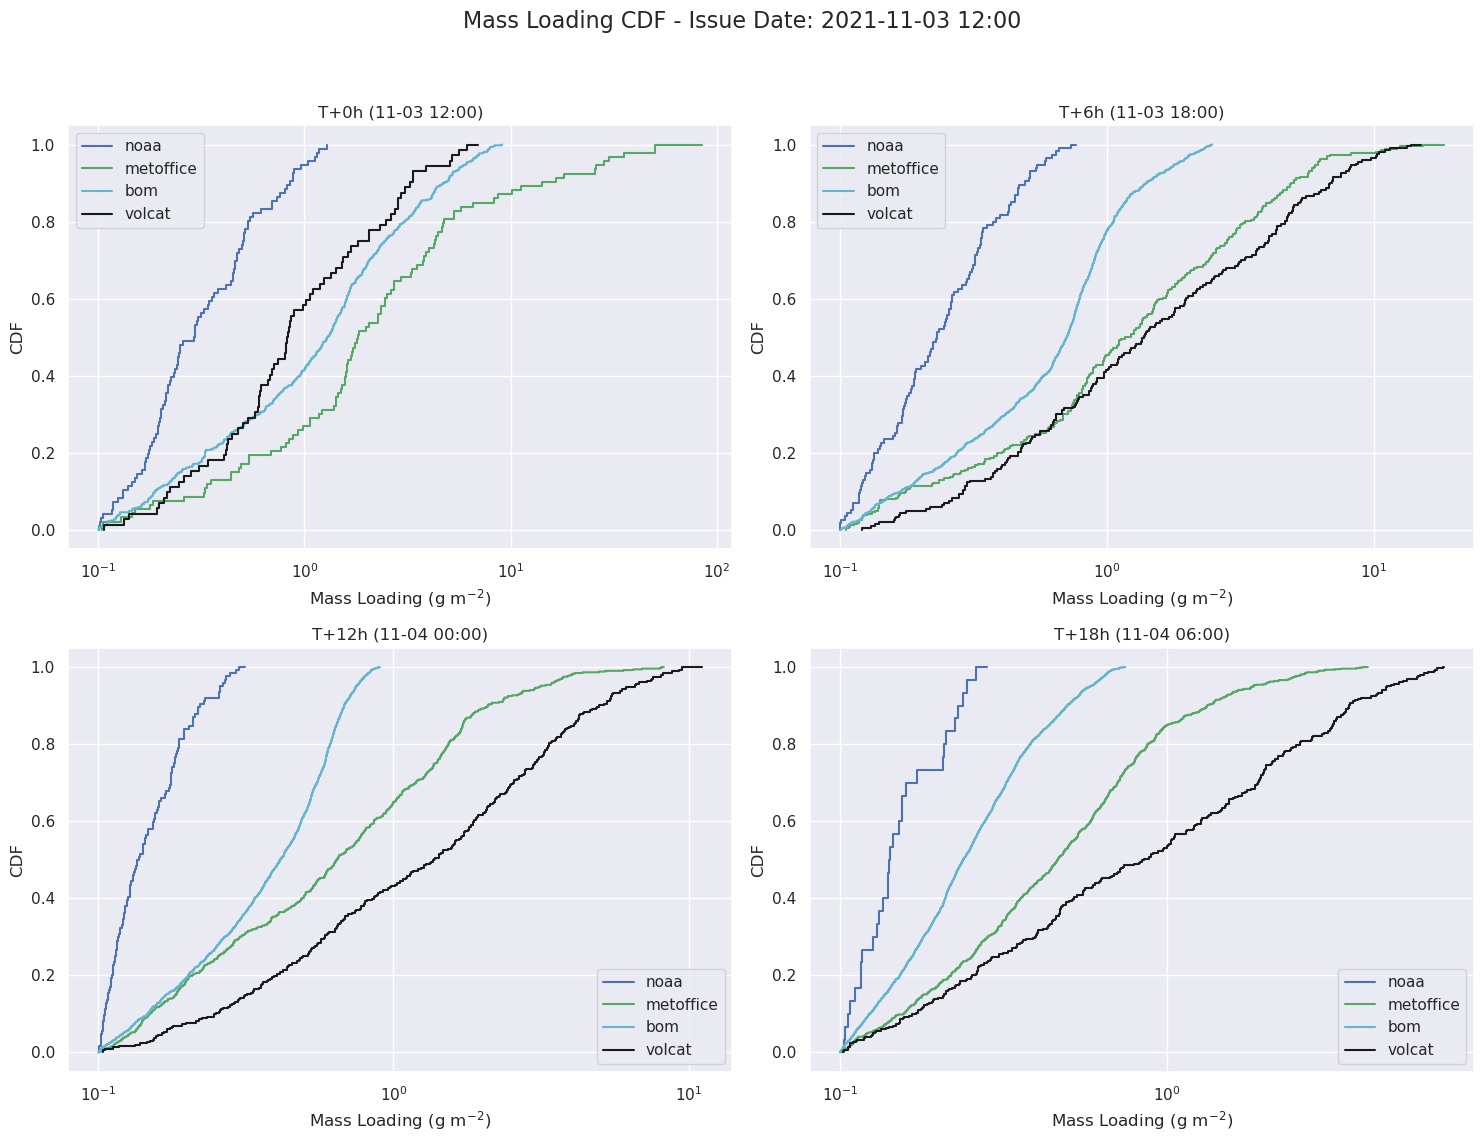

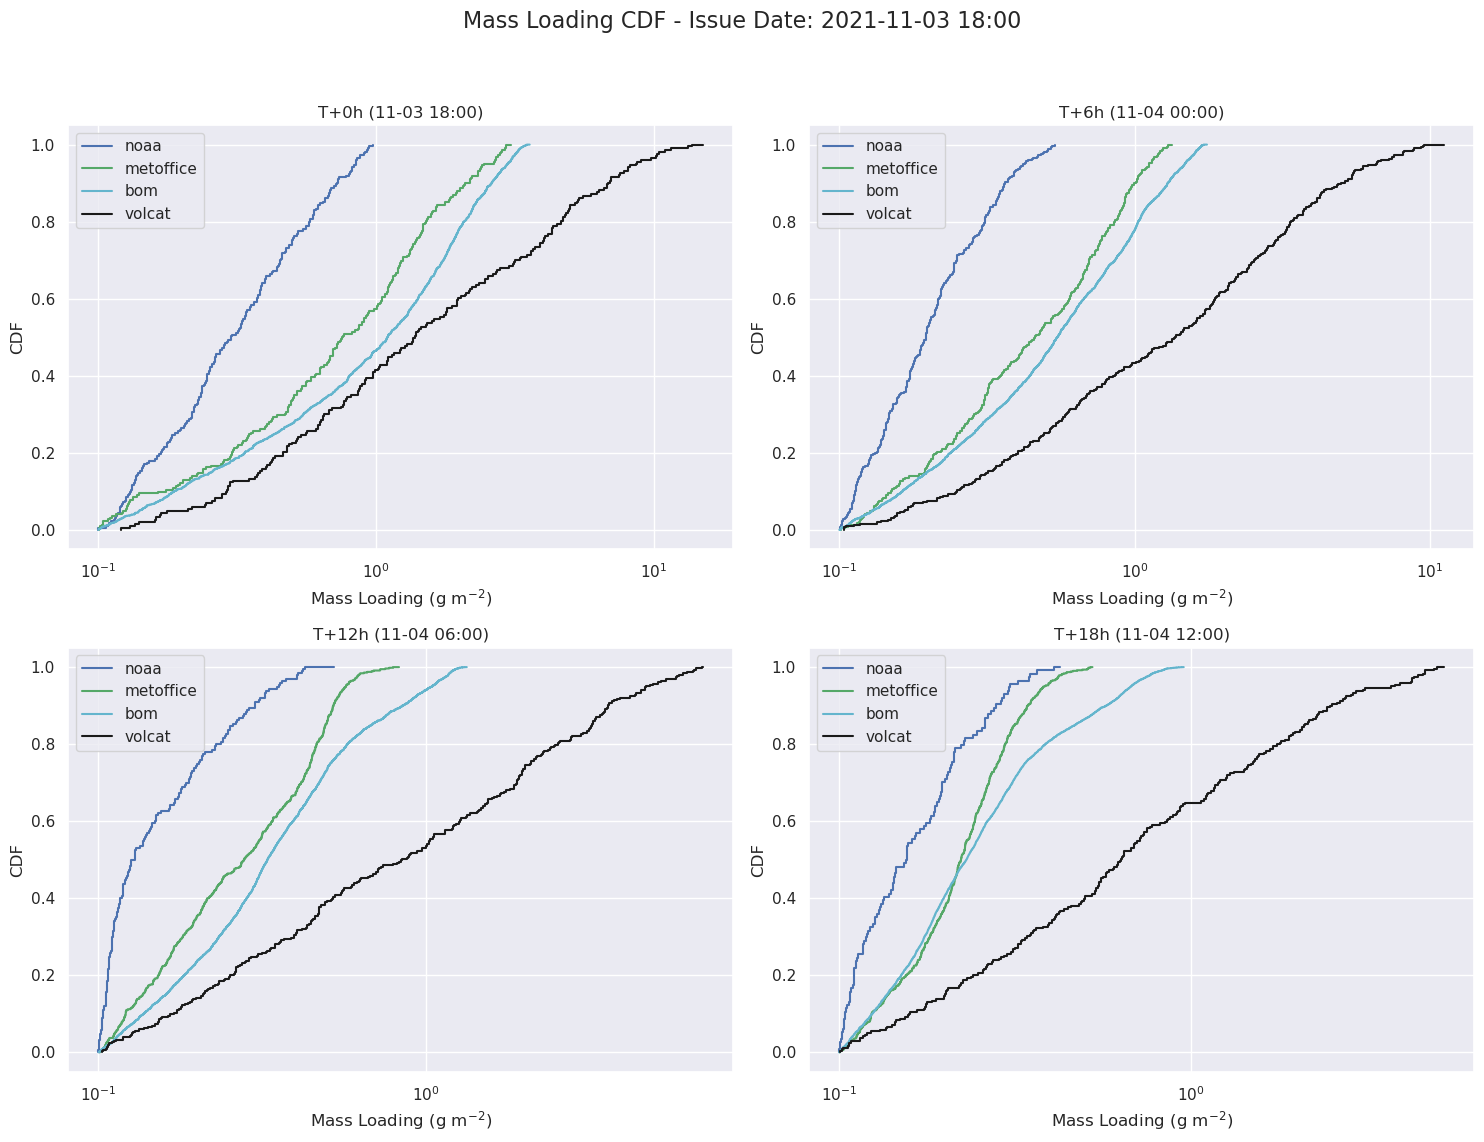

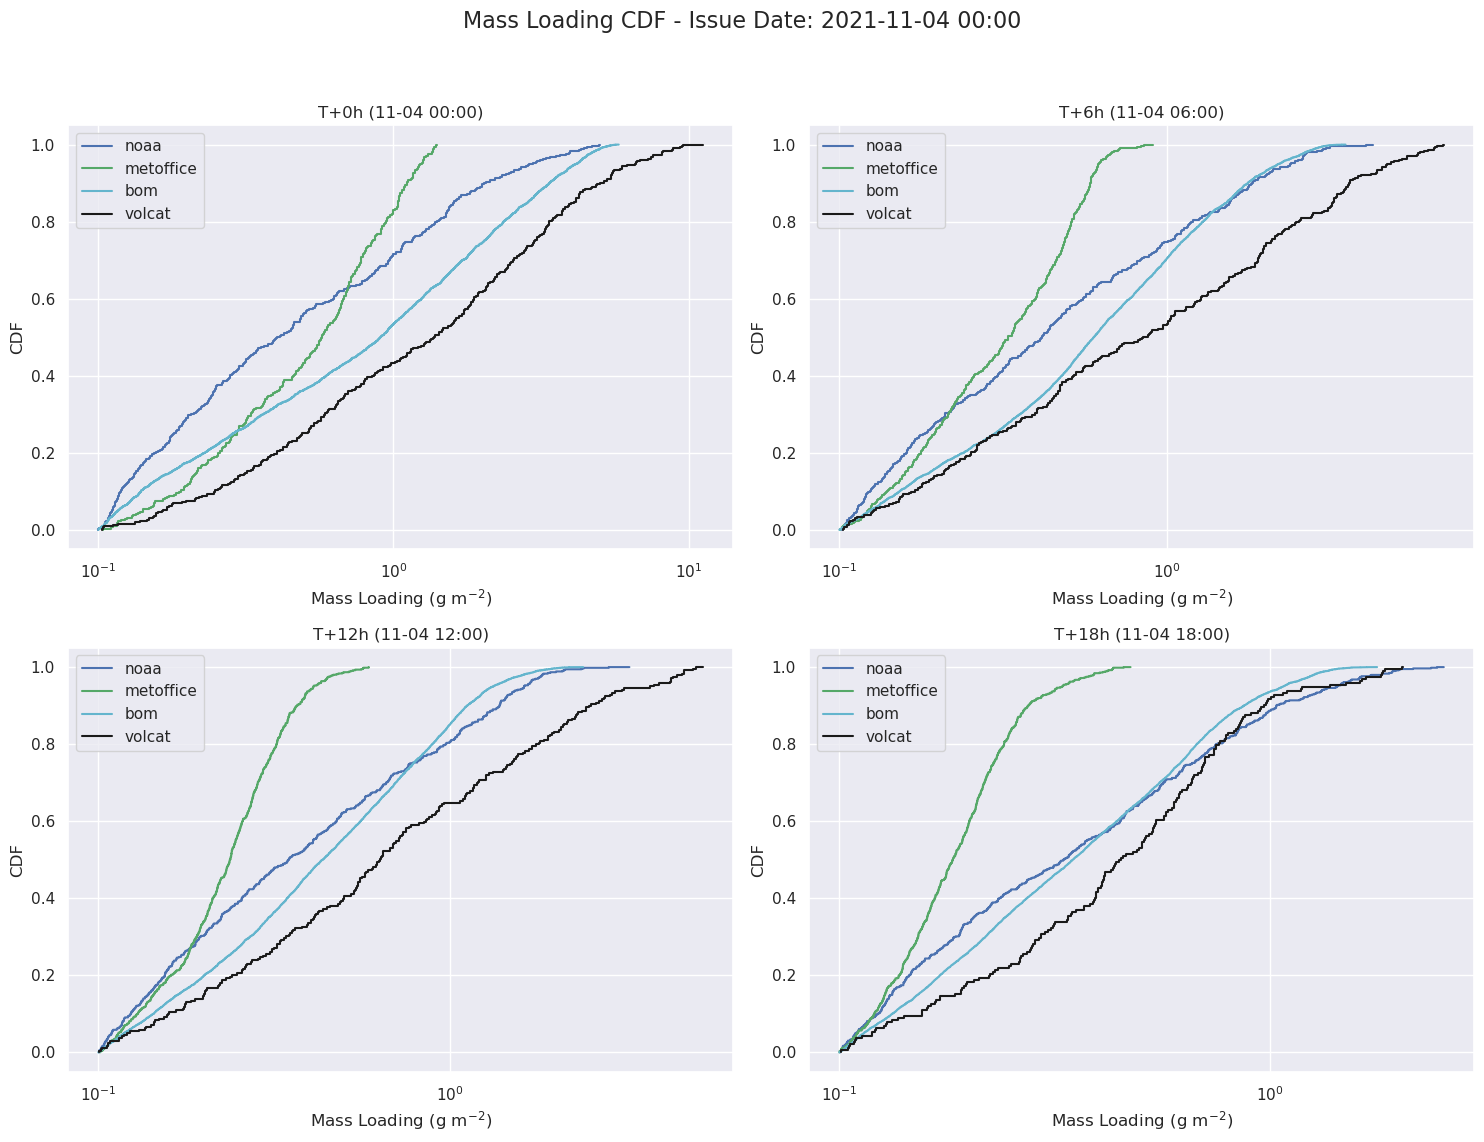

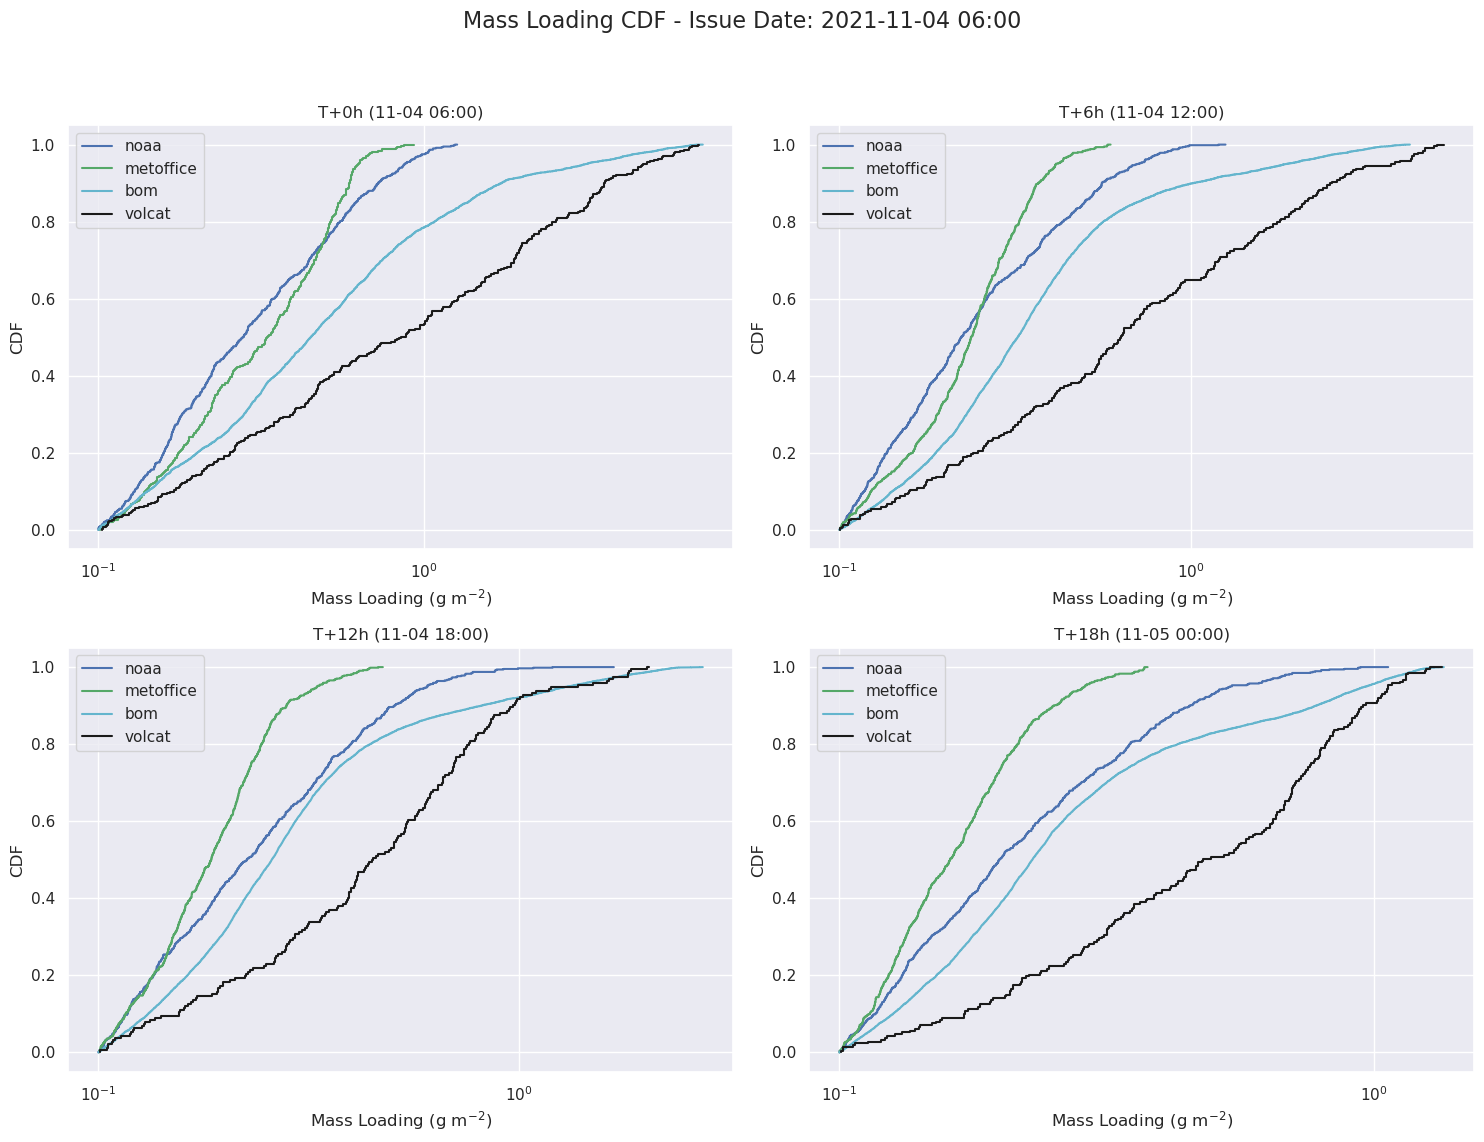

In [23]:
%autoreload
for f in flist:
    print(f)
    plotcdf.plot_cdf_multipanel(comp, f, minval=0.1)

In [36]:
%autoreload
comp.vloc

[159.4424, 54.04855]

In [ ]:
Fo

2021-11-03 09:00:00
0 noaa
1 metoffice
2 bom
3 volcat


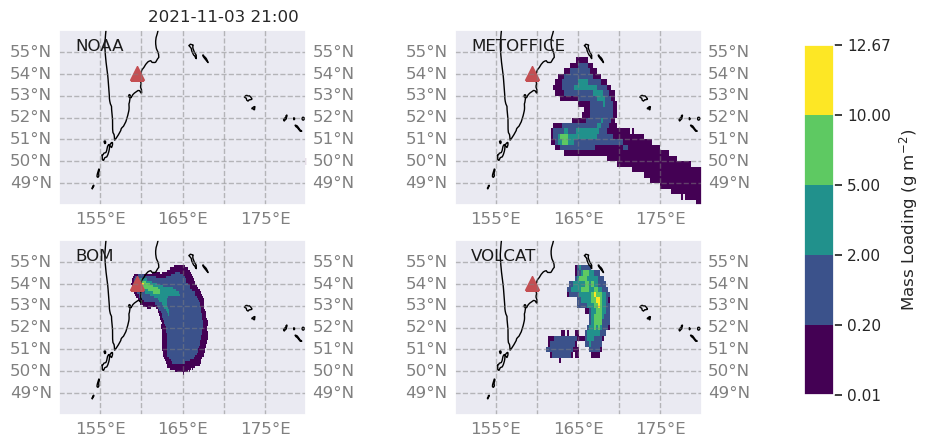

2021-11-03 12:00:00
0 noaa
1 metoffice
2 bom
3 volcat


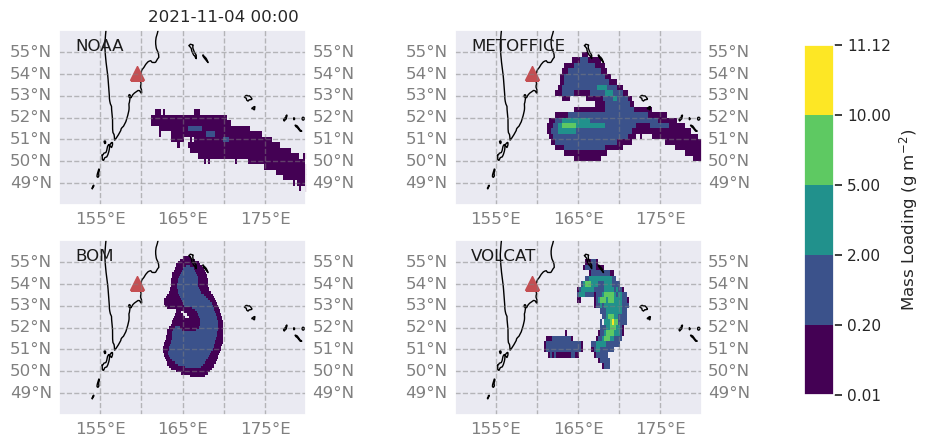

2021-11-03 18:00:00
0 noaa
1 metoffice
2 bom
3 volcat


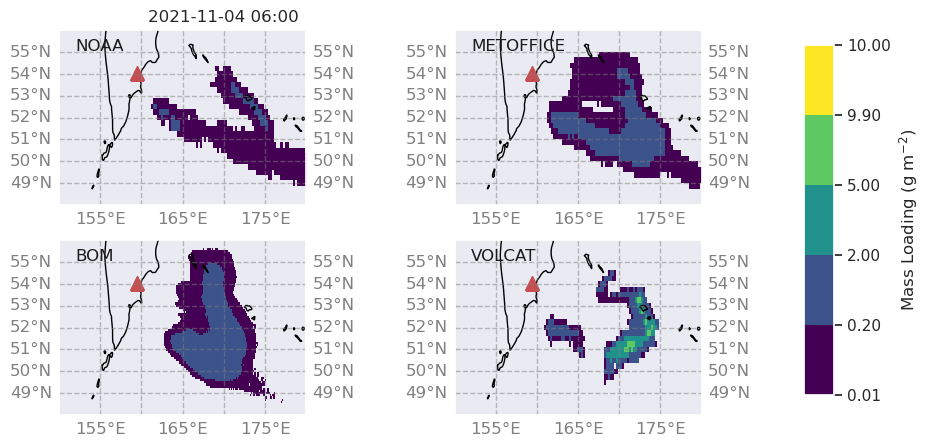

2021-11-04 00:00:00
0 noaa
1 metoffice
2 bom
3 volcat


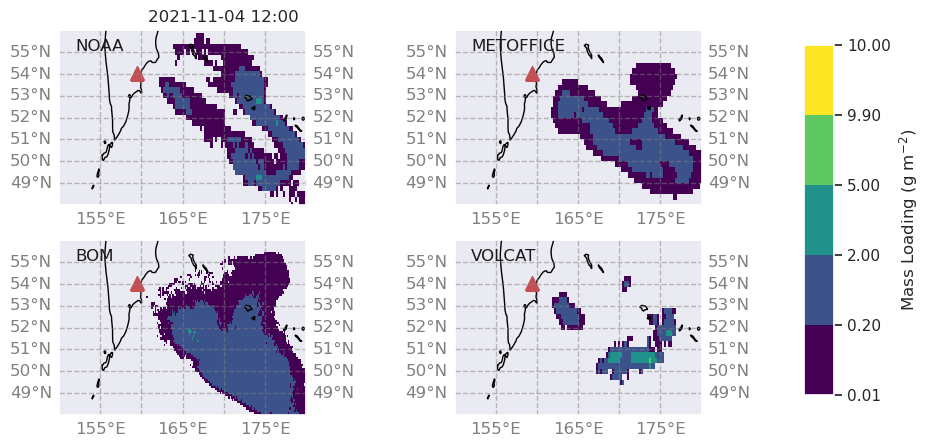

2021-11-04 06:00:00
0 noaa
1 metoffice
2 bom
3 volcat


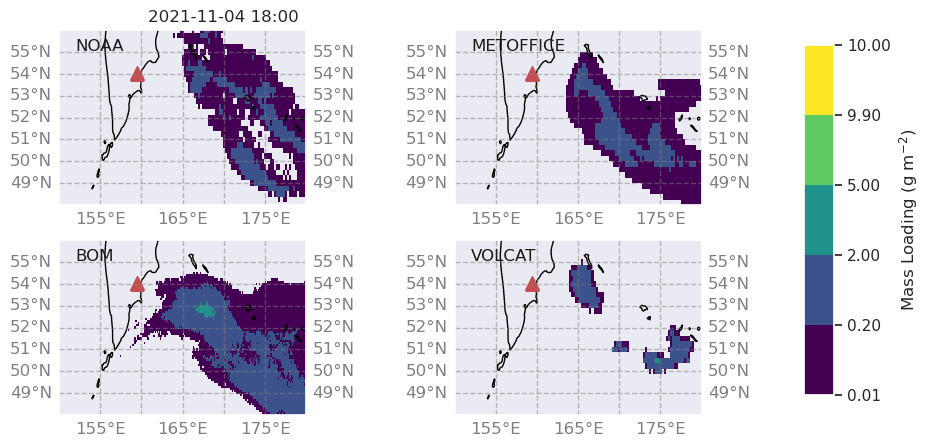

In [30]:
%autoreload
import seaborn as sns
for f in flist:
    print(f)
    sns.set()
    hrs = 12
    dt = datetime.timedelta(hours=hrs)
    comp.plot_mass(f,f+dt)
    plt.show()
#plt.savefig('MassLoad_Issue1103T12_T{}.jpg'.format(hrs), bbox_inches='tight', dpi=150)

In [7]:
%autoreload
noaa = readers.NOAA(tdir='/hysplit3/alicec/projects/karymsky/HYSPLIT_results/')
n2 = noaa.get_forecast(datetime.datetime(2021,11,3,12,0))
n3 = noaa.get_forecast(datetime.datetime(2021,11,3,18,0))
n4 = noaa.get_forecast(datetime.datetime(2021,11,4,0,0))
n5 = noaa.get_forecast(datetime.datetime(2021,11,4,6,0))

2021-11-03 18:00:00
2021-11-04 00:00:00
2021-11-04 06:00:00
2021-11-04 12:00:00
2021-11-04 18:00:00
2021-11-05 00:00:00
2021-11-05 06:00:00
2021-11-05 12:00:00


In [8]:
%autoreload
for n in noaa.namehash:
    print(n, noaa.namehash[n])

2021-11-03 08:00:00 HYSPLIT_inv_forecast_0.nc
2021-11-03 09:00:00 HYSPLIT_inv_forecast_1.nc
2021-11-03 12:00:00 HYSPLIT_inv_forecast_2.nc
2021-11-03 18:00:00 HYSPLIT_inv_forecast_3.nc
2021-11-04 00:00:00 HYSPLIT_inv_forecast_4.nc
2021-11-04 06:00:00 HYSPLIT_inv_forecast_5.nc
2021-11-04 12:00:00 HYSPLIT_inv_forecast_6.nc
2021-11-04 18:00:00 HYSPLIT_inv_forecast_7.nc
2021-11-05 00:00:00 HYSPLIT_inv_forecast_8.nc
2021-11-05 06:00:00 HYSPLIT_inv_forecast_9.nc
2021-11-05 12:00:00 HYSPLIT_inv_forecast_10.nc
